In [2]:
!pip install pandas
import pandas as pd

In [3]:
df_AGV = pd.read_csv("C:/Users/ashwi/Assignment10/green_information.csv", encoding='latin-1')

In [4]:
print(df_AGV.head())

      Case Number                     Category  \
0  AH1-ALG-RS-001  IAH Year - 1 Rental Housing   
1  AH1-ALG-RS-001  IAH Year - 1 Rental Housing   
2  AH1-ALG-RS-001  IAH Year - 1 Rental Housing   
3  AH1-ALG-RS-001  IAH Year - 1 Rental Housing   
4  AH1-ALG-RS-001  IAH Year - 1 Rental Housing   

                                    Program    Initiative  Organization  \
0  Investment in Affordable Housing Program  IAH Year - 1  Algoma DSSAB   
1  Investment in Affordable Housing Program  IAH Year - 1  Algoma DSSAB   
2  Investment in Affordable Housing Program  IAH Year - 1  Algoma DSSAB   
3  Investment in Affordable Housing Program  IAH Year - 1  Algoma DSSAB   
4  Investment in Affordable Housing Program  IAH Year - 1  Algoma DSSAB   

                                                Type  \
0                                    Building Design   
1  Comply with Canadian Environmental Assessment Act   
2                                  Energy Efficiency   
3                       

In [5]:
#task: 2
# Summary statistics
summary_stats = df_AGV.describe()
print("\nSummary Statistics:")
print(summary_stats)

# Data types
data_types = df_AGV.dtypes
print("\nData Types:")
print(data_types)


Summary Statistics:
           Case Number                     Category  \
count              554                          554   
unique             135                            9   
top     AH2-CHA-RS-001  IAH Year - 2 Rental Housing   
freq                12                          147   

                                         Program    Initiative  \
count                                        554           554   
unique                                         2             5   
top     Investment in Affordable Housing Program  IAH Year - 2   
freq                                         479           173   

          Organization               Type Value    Unnamed: 7  
count              554                552   539            64  
unique              36                  8    15             1  
top     City of London  Energy Efficiency   Yes  (Aboriginal)  
freq                68                240   148            64  

Data Types:
Case Number     object
Category        

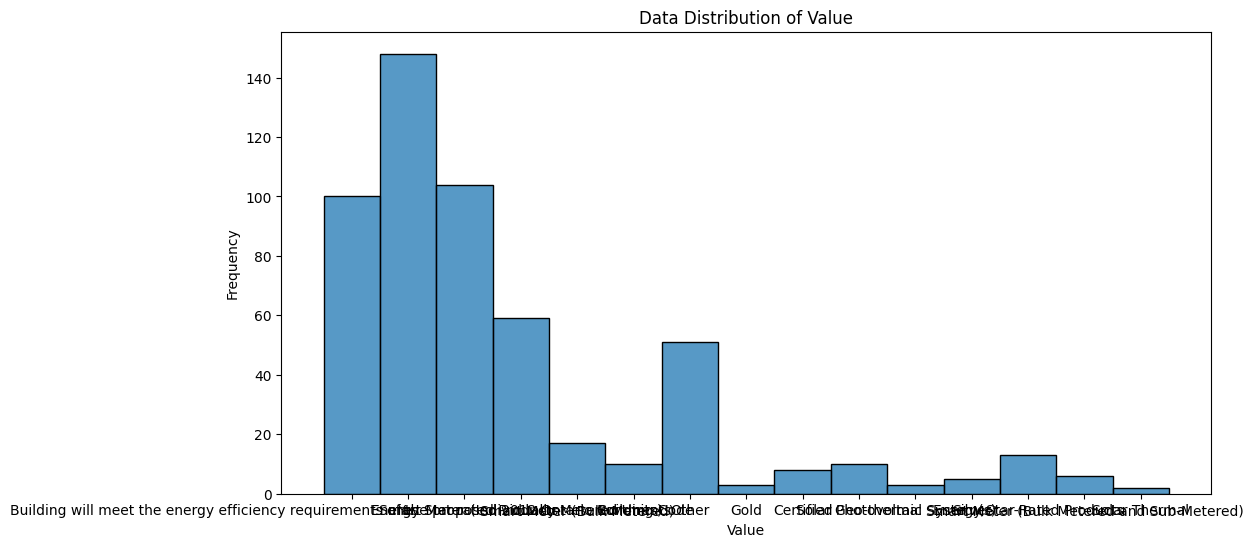

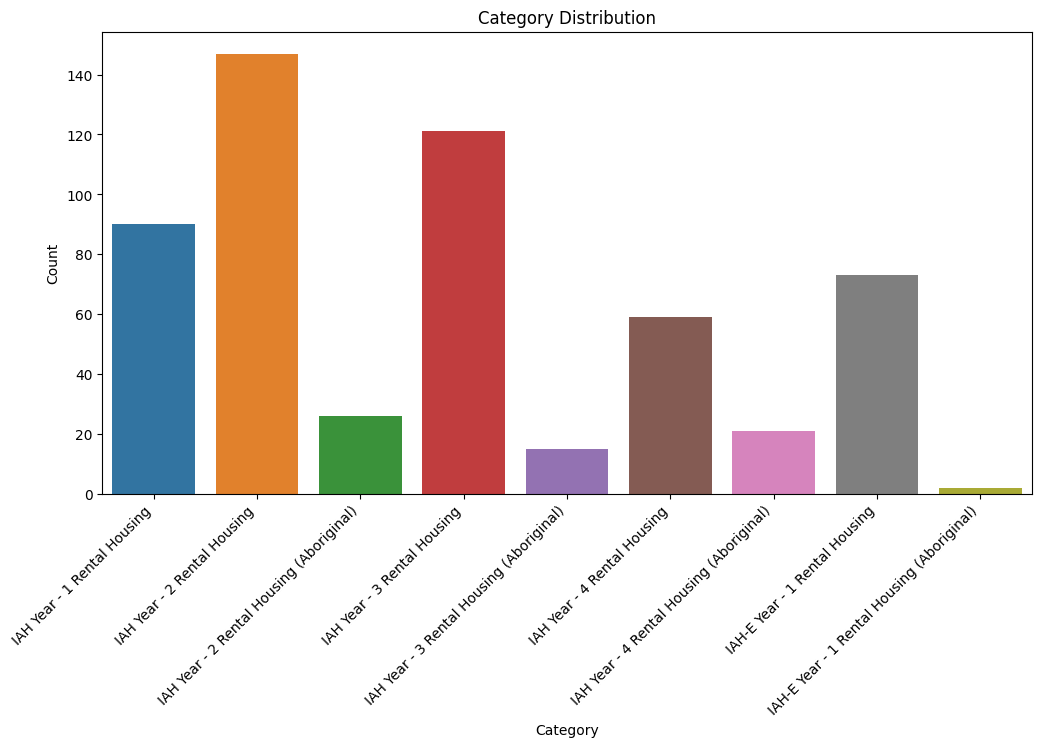

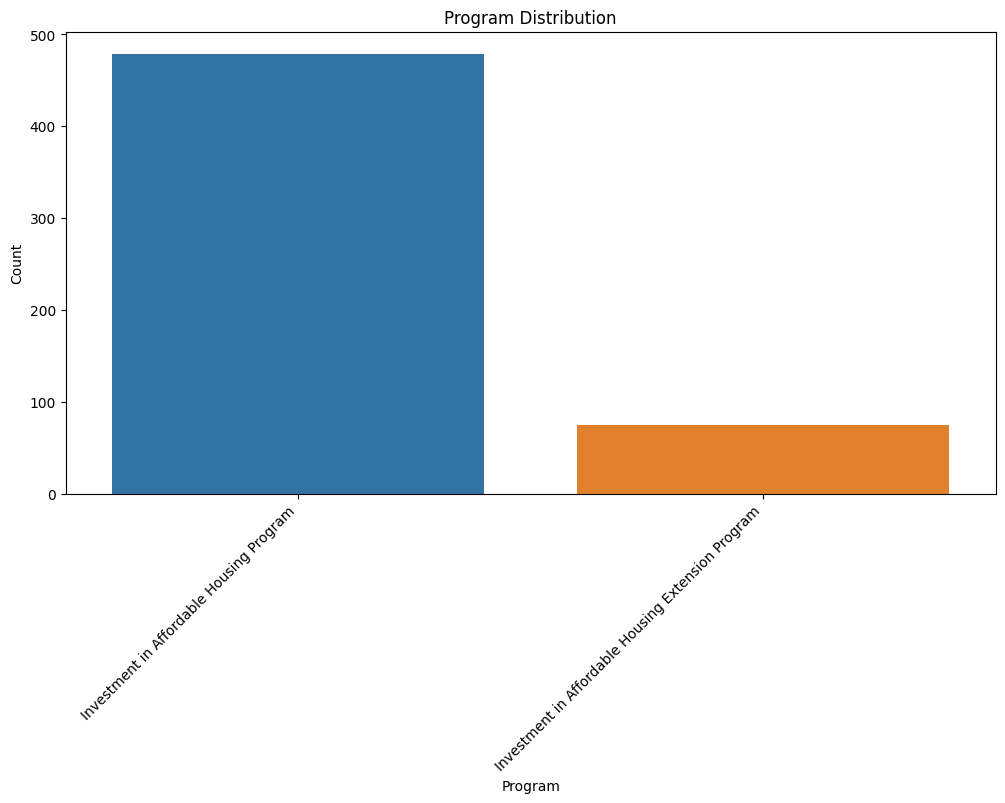

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data distribution visualization
plt.figure(figsize=(12, 6))
sns.histplot(data=df_AGV, x='Value')
plt.title('Data Distribution of Value')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=df_AGV, x='Category')
plt.title('Category Distribution')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=df_AGV, x='Program')
plt.title('Program Distribution')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Program')
plt.ylabel('Count')
plt.show()

In [13]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Step 1: Handling Missing Values
# Fill missing values in 'Type', 'Value', and 'Unnamed: 7' columns with the most frequent value (mode)
df_AGV['Type'].fillna(df_AGV['Type'].mode()[0], inplace=True)
df_AGV['Value'].fillna(df_AGV['Value'].mode()[0], inplace=True)
df_AGV['Unnamed: 7'].fillna(df_AGV['Unnamed: 7'].mode()[0], inplace=True)

# Step 2: Encoding Categorical Variables
# Use LabelEncoder to convert categorical columns into numerical representation
label_encoder = LabelEncoder()
categorical_columns = ['Case Number', 'Category', 'Program', 'Initiative', 'Organization', 'Type', 'Value', 'Unnamed: 7']

for column in categorical_columns:
    df_AGV[column] = label_encoder.fit_transform(df_AGV[column])

# Step 3: Feature Engineering (optional)
# If you have specific feature engineering tasks, you can perform them here.

# Step 4: Removing Unnecessary Columns
# If 'Unnamed: 7' column contains mostly missing values, you might consider removing it from the dataset.
df_AGV.drop(['Unnamed: 7'], axis=1, inplace=True)

# Print the first few rows of the preprocessed DataFrame
print(df_AGV.head())

# Save the preprocessed DataFrame to a new CSV file (if needed)
df_AGV.to_csv("C:/Users/ashwi/Assignment10/preprocessed_green_information.csv", index=False)
df_preprocessed_dataset_AGV = pd.read_csv("C:/Users/ashwi/Assignment10/preprocessed_green_information.csv")
print(df_preprocessed_dataset_AGV.head())



   Case Number  Category  Program  Initiative  Organization  Type  Value
0            0         0        1           0             0     0      0
1            0         0        1           0             0     1     14
2            0         0        1           0             0     2      4
3            0         0        1           0             0     2     11
4            0         0        1           0             0     0      0
   Case Number  Category  Program  Initiative  Organization  Type  Value
0            0         0        1           0             0     0      0
1            0         0        1           0             0     1     14
2            0         0        1           0             0     2      4
3            0         0        1           0             0     2     11
4            0         0        1           0             0     0      0


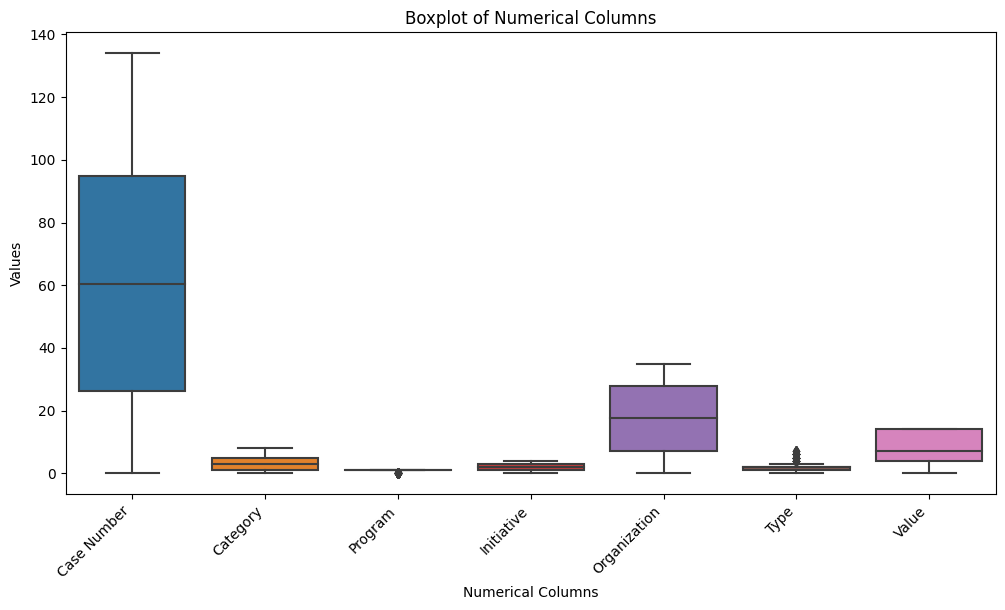

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Let's plot boxplots for numerical columns (if any)
numerical_columns = df_preprocessed_dataset_AGV.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_preprocessed_dataset_AGV[numerical_columns])
plt.title('Boxplot of Numerical Columns')
plt.xlabel('Numerical Columns')
plt.ylabel('Values')
plt.xticks(rotation=45, ha='right')
plt.show()


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load the preprocessed data (if not already loaded)
df_preprocessed_dataset_AGV = pd.read_csv("C:/Users/ashwi/Assignment10/preprocessed_green_information.csv")

# Prepare the feature matrix X and target variable y
X = df_preprocessed_dataset_AGV.drop(['Category'], axis=1)  # Assuming 'Category' is the target variable
y = df_preprocessed_dataset_AGV['Category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1: Support Vector Machine (SVM)
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Model 2: Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


In [16]:
# Evaluation Metrics
def evaluate_model_performance(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    cm = confusion_matrix(y_true, y_pred)
    return accuracy, precision, recall, f1, cm

# Evaluate SVM Model
accuracy_svm, precision_svm, recall_svm, f1_svm, cm_svm = evaluate_model_performance(y_test, y_pred_svm)
print("SVM Model Evaluation:")
print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1 Score:", f1_svm)
print("Confusion Matrix:")
print(cm_svm)

# Evaluate Random Forest Model
accuracy_rf, precision_rf, recall_rf, f1_rf, cm_rf = evaluate_model_performance(y_test, y_pred_rf)
print("\nRandom Forest Model Evaluation:")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)
print("Confusion Matrix:")
print(cm_rf)


SVM Model Evaluation:
Accuracy: 0.9099099099099099
Precision: 0.8874115186615186
Recall: 0.9099099099099099
F1 Score: 0.8944035802723687
Confusion Matrix:
[[27  0  0  0  0  0  0  0  0]
 [ 0 29  0  0  0  0  0  0  0]
 [ 0  3  0  0  0  0  0  0  0]
 [ 0  0  0 25  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0]
 [ 0  0  0  2  0  4  2  0  0]
 [ 0  0  0  0  0  1  2  0  0]
 [ 0  0  0  0  0  0  0 14  1]
 [ 0  0  0  0  0  0  0  0  0]]

Random Forest Model Evaluation:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[27  0  0  0  0  0  0  0]
 [ 0 29  0  0  0  0  0  0]
 [ 0  0  3  0  0  0  0  0]
 [ 0  0  0 25  0  0  0  0]
 [ 0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  8  0  0]
 [ 0  0  0  0  0  0  3  0]
 [ 0  0  0  0  0  0  0 15]]


C:\Users\ashwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ashwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


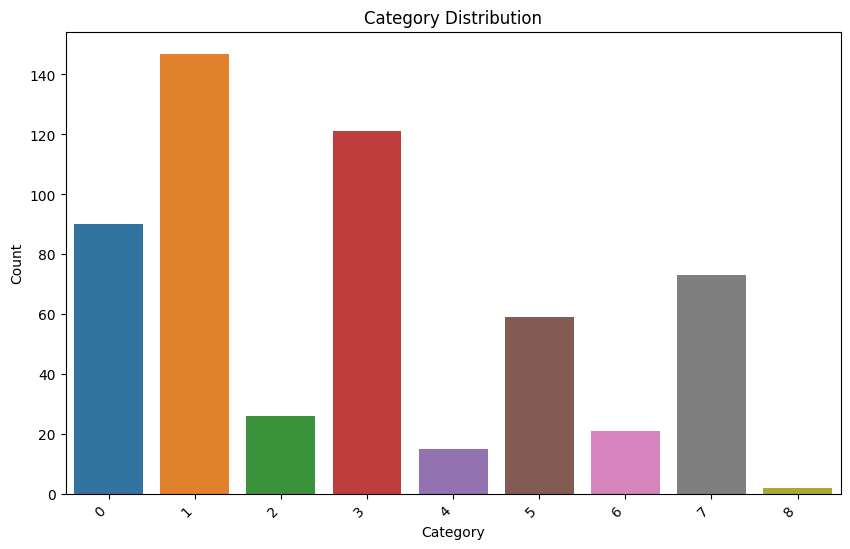

C:\Users\ashwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


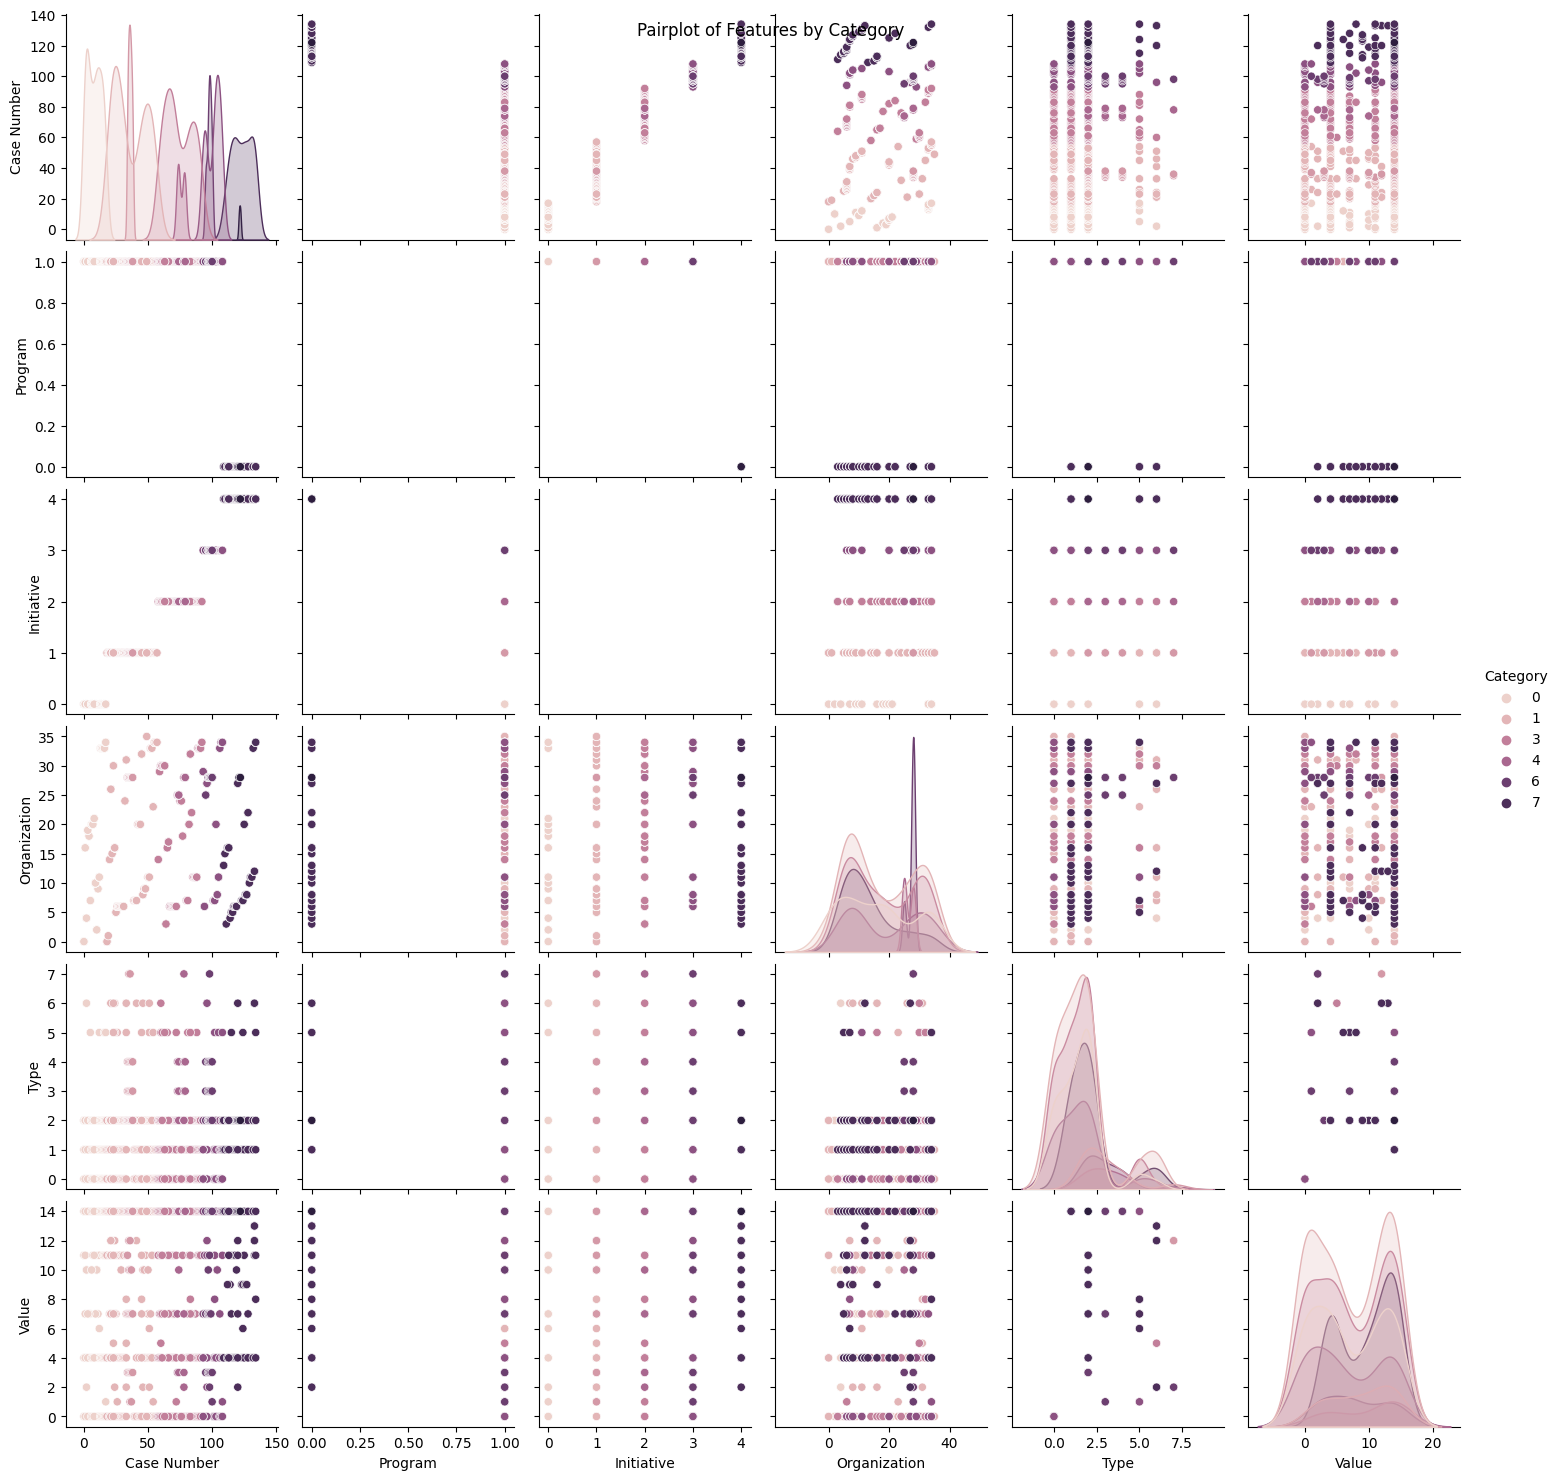

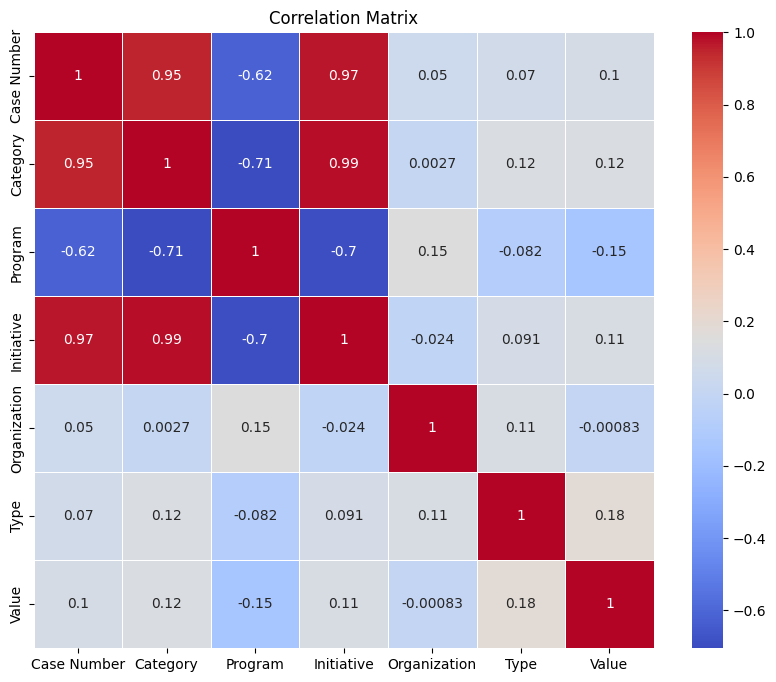

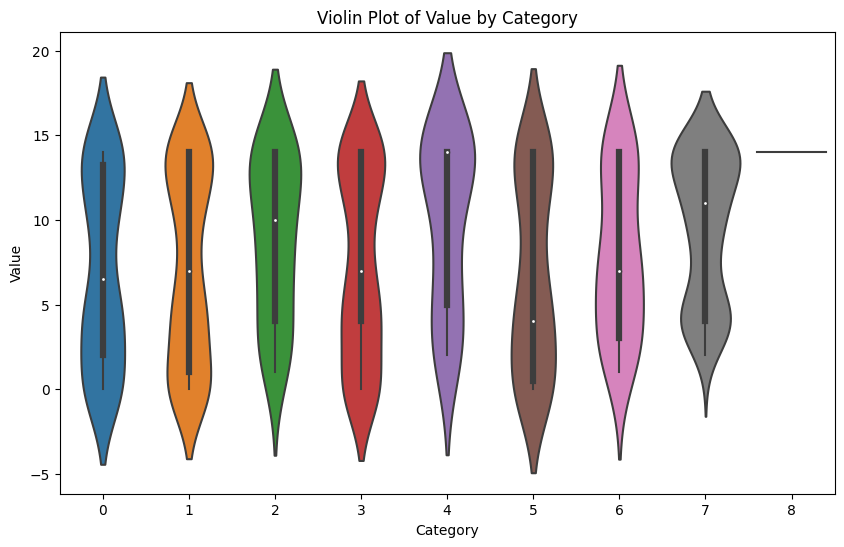

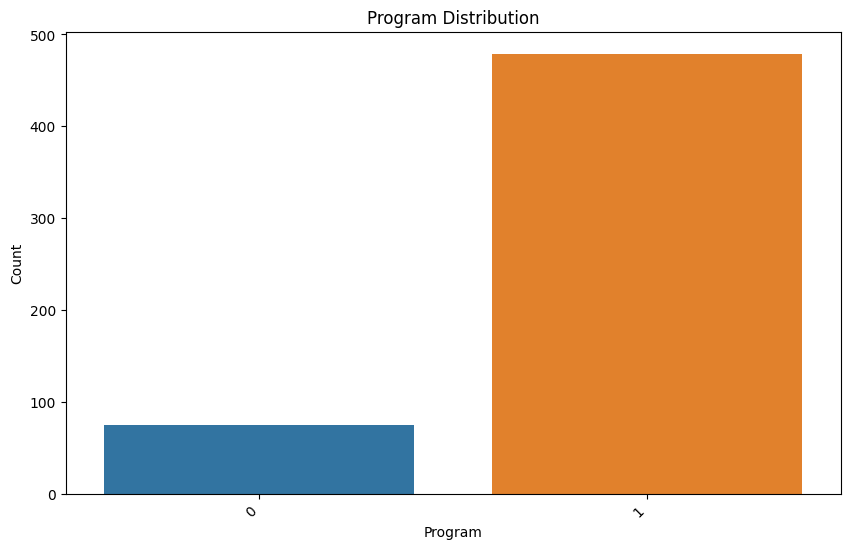

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the preprocessed data (if not already loaded)
df_preprocessed_dataset_AGV = pd.read_csv("C:/Users/ashwi/Assignment10/preprocessed_green_information.csv")

# Visualization 1: Bar Chart - Category Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df_preprocessed_dataset_AGV, x='Category')
plt.title('Category Distribution')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

# Visualization 2: Pairplot
sns.pairplot(df_preprocessed_dataset_AGV, hue='Category')
plt.suptitle('Pairplot of Features by Category')
plt.show()

# Visualization 3: Heatmap - Correlation Matrix
correlation_matrix = df_preprocessed_dataset_AGV.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Visualization 4: Violin Plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_preprocessed_dataset_AGV, x='Category', y='Value')
plt.title('Violin Plot of Value by Category')
plt.xlabel('Category')
plt.ylabel('Value')
plt.show()

# Visualization 5: Bar Chart - Program Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df_preprocessed_dataset_AGV, x='Program')
plt.title('Program Distribution')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Program')
plt.ylabel('Count')
plt.show()
